### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
df = pd.read_csv('data/ecommerce_sales_data.csv')
df.head()

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09


In [3]:
# 2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
print(df.isnull().sum())
# 결측값을 0으로 대체
df.fillna(0, inplace=True)
df.isnull().sum()

OrderID         0
Product         0
Category        0
Quantity        0
Price           0
CustomerID      0
Birthdate       0
OrderDate       0
Country         0
DiscountRate    1
dtype: int64


OrderID         0
Product         0
Category        0
Quantity        0
Price           0
CustomerID      0
Birthdate       0
OrderDate       0
Country         0
DiscountRate    0
dtype: int64

In [4]:
# 3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.
print(df.dtypes)
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.dtypes

OrderID           int64
Product          object
Category         object
Quantity          int64
Price             int64
CustomerID        int64
Birthdate        object
OrderDate        object
Country          object
DiscountRate    float64
dtype: object


OrderID                  int64
Product                 object
Category                object
Quantity                 int64
Price                    int64
CustomerID               int64
Birthdate               object
OrderDate       datetime64[ns]
Country                 object
DiscountRate           float64
dtype: object

2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [5]:
# 1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
df['TotalRevenue'] = df['Price'] * df['Quantity']
df

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate,TotalRevenue
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18:00,미국,0.14,185000
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45:00,독일,0.29,100000
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19:00,중국,0.23,32000
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 02:19:00,일본,0.20,8000
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34:00,대한민국,0.09,78000
...,...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57:00,독일,0.20,33000
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37:00,대한민국,0.09,164000
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27:00,독일,0.09,33000
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 09:01:00,독일,0.06,86000


<Axes: xlabel='OrderDate'>

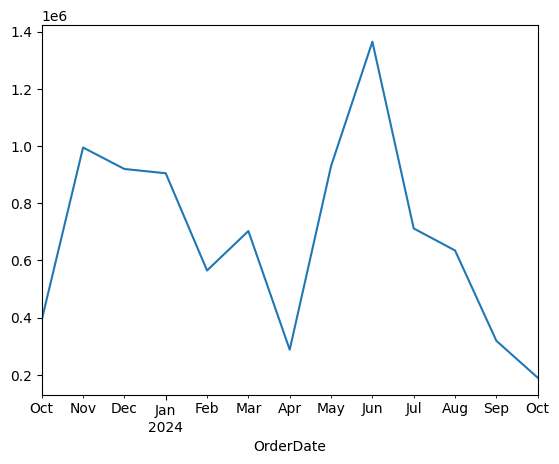

In [6]:
# 2. 월별 총 매출액을 집계하여 시각화하세요.
#         - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
df.set_index('OrderDate').resample('ME')['TotalRevenue'].sum().plot()

In [7]:
# 3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
df.groupby('Category')['TotalRevenue'].sum().sort_values(ascending=False).head(3)

Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64

In [8]:
# 4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.
df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False).head(5)

Country
미국      2238000
독일      1973000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [9]:
# 1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
df.groupby('CustomerID')['TotalRevenue'].sum().sort_values(ascending=False).head(5)

CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64

In [10]:
# 2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
df.groupby('CustomerID')['OrderID'].count().sort_values(ascending=False).head(5)

CustomerID
1007    2
1038    2
1141    2
1278    2
1421    2
Name: OrderID, dtype: int64

In [11]:
# 3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
#     - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.
# birth ex) 1980-08-08

df['Age'] = df['Birthdate'].apply(lambda x: 2025 - int(x.split('-')[0]))
df['AgeGroup'] = df['Age'].apply(lambda x: '10s' if x < 20 else '20s' if x < 30 else '30s' if x < 40 else '40s' if x < 50 else '50s' if x < 60 else '60s')
df.groupby('AgeGroup')['Category'].apply(lambda x: x.value_counts().index[0])

AgeGroup
20s         Beauty
30s           Food
40s          Books
50s    Electronics
60s    Electronics
Name: Category, dtype: object

4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [12]:
# 1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)

Product
셔츠     25
립스틱    22
소설     21
커피     20
역사책    20
Name: Quantity, dtype: int64

In [13]:
# 2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
df.groupby('Category')['Product'].apply(lambda x: x.value_counts().index[0])

Category
Beauty         립스틱
Books          역사책
Clothing        셔츠
Electronics    노트북
Food            과자
Sports         축구공
Name: Product, dtype: object

In [14]:
# 3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.
df.groupby('Product')['Quantity'].mean().sort_values(ascending=False).head(3)

Product
주스      5.0
자기계발    5.0
요가매트    4.0
Name: Quantity, dtype: float64

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

<Axes: xlabel='OrderDate'>

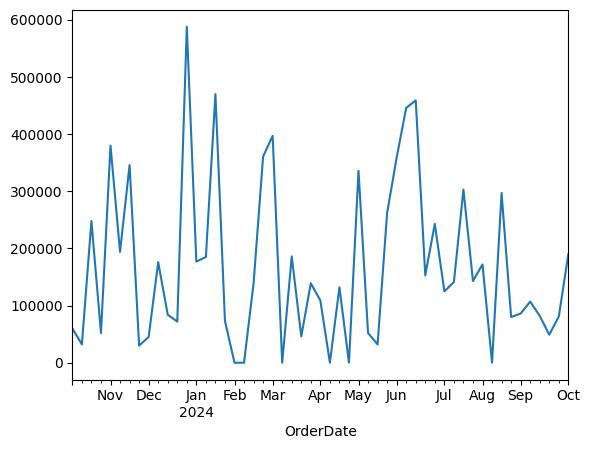

In [15]:
# 1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
df.set_index('OrderDate').resample('W')['TotalRevenue'].sum().plot()

<Axes: xlabel='OrderDate'>

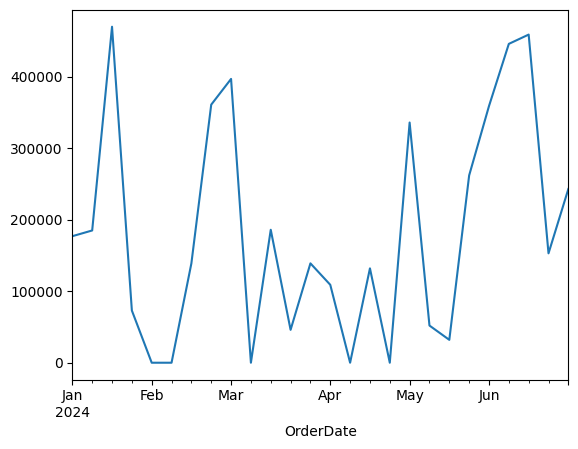

In [16]:
# 2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
df_order_date = df[(df['OrderDate'] >= '2024-01-01') & (df['OrderDate'] <= '2024-06-30')]
df_order_date.set_index('OrderDate')['TotalRevenue'].resample('W').sum().plot()
# df_order_date.set_index('OrderDate')['TotalRevenue'].resample('ME').sum().plot()

In [17]:
# 한글 폰트 깨짐 방지를 위한 설정
import matplotlib.font_manager as fm
import matplotlib

font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

<Axes: xlabel='Country'>

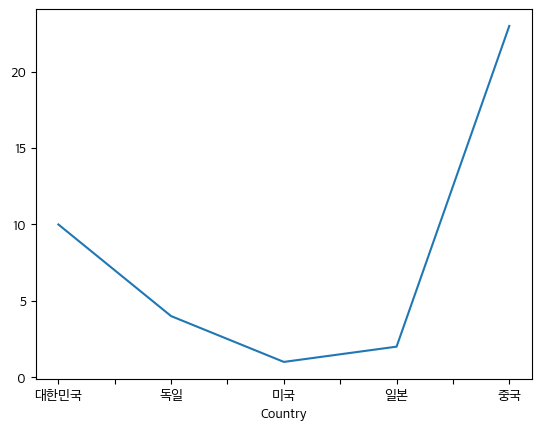

In [18]:
# 3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.
# OrderDate에서 시간을 추출하여 OrderHour 열을 생성
df['OrderHour'] = df['OrderDate'].dt.hour
# 국가별로 주문 시간대를 집계
df.groupby(['Country', 'OrderHour'])['OrderID'].count().unstack().idxmax(axis=1).plot()

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [19]:
# 1. 고객의 **재구매율**을 분석하세요.
df.groupby('CustomerID')['OrderID'].count().value_counts(normalize=True)


OrderID
1    0.918919
2    0.081081
Name: proportion, dtype: float64

In [20]:
# 2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.
# DiscountRate
df['DiscountPrice'] = df['Price'] * (1.0 - df['DiscountRate'])
df['DiscountTotalRevenue'] = df['DiscountPrice'] * df['Quantity']
df.groupby('Category')\
    .agg({'DiscountRate': 'mean', 'DiscountTotalRevenue': 'sum'})\
    .sort_values(by='DiscountRate', ascending=False)

,DiscountRate,DiscountTotalRevenue
Category,,
Beauty,0.186522,1209380.0
Sports,0.179444,866680.0
Electronics,0.175789,1453730.0
Books,0.170000,1166780.0
Food,0.166522,1638980.0
Clothing,0.154000,1059820.0
